# Filter Bubbles

Filter Bubbles refer to the phenomenon wherein individuals are increasingly
exposed to information and perspectives that align with their existing beliefs,
preferences, and interests, while being shielded from contradictory or diverse
viewpoints. In the context of news media aggregators, such as online plat-
forms and social media networks, algorithms curate and prioritize content
based on user-specific data, including past behaviors, interactions, and de-
mographic information. As a result, users are presented with a personalized
stream of news and information that reinforces their preconceptions, limits
exposure to alternative viewpoints, and may contribute to the polarization
of societal discourse.

For this experiment, we take into account one day of analysis.
For that particular day,
and for each user from both the USA and India, we log into their user section, and take note of how many news about a particular topic Google News
returned to that particular user.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

To do this, we build two matrices: the first
m1 x n1 matrix, with m1 rows as many as the topics of users from the USA,
and n1 columns as many as the users from USA plus a column dedicated to
the Home section (the usefulness of the additional column will be explained
in the next rows), and a second matrix m2 x n2 , with m2 rows as many as the
topics of users from India, and n2 columns as many as there are users from
India plus a column dedicated to the Home section.

In [18]:
americanNews_matrix = np.array([[1, 2, 1, 0, 0, 0, 0, 0, 0],
                                [2, 1, 3, 1, 0, 0, 0, 0, 4],
                                [0, 0, 2, 3, 0, 0, 0, 0, 2],
                                [0, 0, 0, 0, 6, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 8, 0, 0, 0],
                                [0, 0, 0, 0, 0, 1, 8, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 3, 0],
                                [0, 0, 0, 0, 0, 0, 0, 5, 0],
                                [7, 0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 7, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 4, 2, 0, 1, 0, 2, 0],
                                [0, 0, 0, 4, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 4, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 2, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [19]:
indianNews_matrix = np.array([[3, 3, 1, 0, 2, 3, 3, 0, 0, 0, 1],
                              [1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 4],
                              [2, 1, 1, 0, 2, 5, 3, 0, 0, 0, 2],
                              [4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0],
                              [0, 4, 0, 6, 1, 0, 0, 10, 0, 0, 0],
                              [0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3],
                              [0, 0, 0, 0, 0, 0, 0, 0, 10, 2, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0]])

The sum of each column is equal to 10: for each user, we take note of how many news articles up to a maximum of 10 were presented by Google News to the users. In this way, we can define the numbers in the cell as the number of news articles presented to user i (with i ranging from Ui to Um ) belonging to topic j (with j ranging from T1 to Tn ).

The first three topics of matrix 1 are, respectively, Republican Party, Democratic Party and Neutral Party. The first three topics of
matrix 2 are, respectively, pro-Government Party, pro-Opposition Party and
Neutral Party.

### Click-through Rate (CTR)

CTR (Click-Through Rate) is a metric that measures **the percentage of clicks on recommended articles compared to the total number of recommended articles**.

- Original CTR: In the original paper, the CTR (Click-Through Rate) is calculated as **the fraction of recommended articles (N) that the user clicks on (ri = 1)**. **The sum of clicks on recommended items is divided by the total number of recommended items (N items)**.

- Our CTR: *calculate_custom_CTR* calculates a CTR-like metric based on the matrix. The metric represents **the fraction of views in the "Home" column compared to total views**. This metric takes into account article views on the homepage.

In the original paper, CTR is defined as the fraction of recommended articles that the user clicks on, which represents specific user behavior towards recommended content.

In our case, we are trying to similarly evaluate how much users view content from a certain topic on the homepage, but without considering actual clicks. So, while the approach is similar in that they both seek to measure user interaction with recommended content, there are key differences in defining the metrics.

In [4]:
# Definisci una funzione per calcolare il CTR
def calculate_CTR(matrix):
    # Calcola la somma delle visualizzazioni nella matrice
    total_views = np.sum(matrix)
    
    # Calcola la somma delle visualizzazioni nella colonna "Home" (ultima colonna)
    home_views = np.sum(matrix[:, -1])
    
    # Calcola la metrica come la frazione di visualizzazioni nella colonna "Home"
    CTR = home_views / total_views
    
    return CTR

# Calcola il CTR
ctr = calculate_CTR(matrix)
print("Click-Through Rate (CTR):", ctr)

Click-Through Rate (CTR): 0.09090909090909091


Our Click-Through Rate (CTR) result is 0.09090909090909091, which represents the percentage of homepage article views compared to total views. In other words, approximately 8.33% of homepage views had a click or similar interaction.

## Average News Document Stance 

This index represents the average position of the news viewed by users based on the various topics considered. This index is calculated for each user and for each topic of interest. It’s calculated for each user as a weighted average of the scores relating to the various topics.

In [20]:
def calculate_american_scores(matrix):
    # Estrai le prime tre righe (republican, democratic, neutral)
    topics = matrix[:3]

    # Inizializza una lista per gli utenti
    users = []

    # Calcola i punteggi per ciascun utente
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  # Per l'utente n, inizia da 1
        for topic_index, topic in enumerate(topics):
            topic_name = ''
            if topic_index == 0:
                topic_name = 'rep'
            elif topic_index == 1:
                topic_name = 'dem'
            else:
                topic_name = 'neu'
            
            user[f'{topic_name} score'] = topic[user_index] / sum(topic)
        
        users.append(user)

    return users

In [21]:
americanUser_scores = calculate_american_scores(americanNews_matrix)

# Stampa i risultati
for user in americanUser_scores:
    print(f"U{user['User']}:")
    for topic in ['rep', 'dem', 'neu']:
        print(f"{topic} score: {user[f'{topic} score']:.2f}")

U1:
rep score: 0.25
dem score: 0.18
neu score: 0.00
U2:
rep score: 0.50
dem score: 0.09
neu score: 0.00
U3:
rep score: 0.25
dem score: 0.27
neu score: 0.29
U4:
rep score: 0.00
dem score: 0.09
neu score: 0.43
U5:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U6:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U7:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U8:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U9:
rep score: 0.00
dem score: 0.36
neu score: 0.29


In [22]:
def calculate_indian_scores(matrix):
    # Estrai le prime tre righe (republican, democratic, neutral)
    topics = matrix[:3]

    # Inizializza una lista per gli utenti
    users = []

    # Calcola i punteggi per ciascun utente
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  # Per l'utente n, inizia da 1
        for topic_index, topic in enumerate(topics):
            topic_name = ''
            if topic_index == 0:
                topic_name = 'gov'
            elif topic_index == 1:
                topic_name = 'opp'
            else:
                topic_name = 'neu'
            
            user[f'{topic_name} score'] = topic[user_index] / sum(topic)
        
        users.append(user)

    return users

In [23]:
indianUser_scores = calculate_indian_scores(indianNews_matrix)

# Stampa i risultati con nomi utente personalizzati
for user_index, user in enumerate(indianUser_scores, start=11):
    user_name = f"I{user_index}"
    print(f"{user_name}:")
    for topic in ['gov', 'opp', 'neu']:
        print(f"{topic} score: {user[f'{topic} score']:.2f}")


I11:
gov score: 0.19
opp score: 0.06
neu score: 0.12
I12:
gov score: 0.19
opp score: 0.12
neu score: 0.06
I13:
gov score: 0.06
opp score: 0.25
neu score: 0.06
I14:
gov score: 0.00
opp score: 0.25
neu score: 0.00
I15:
gov score: 0.12
opp score: 0.06
neu score: 0.12
I16:
gov score: 0.19
opp score: 0.00
neu score: 0.31
I17:
gov score: 0.19
opp score: 0.00
neu score: 0.19
I18:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I19:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I20:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I21:
gov score: 0.06
opp score: 0.25
neu score: 0.12


## Entropy User Score

The calculation
of user entropy (entropy user scores) evaluate the diversity of that particular
user’s preferences with respect to the various topics considered in the context
to of the news aggregator. Entropy measures the uncertainty or variability
of user preferences across different topics.

To calculate this index, we scroll
through the columns of the matrix (representing the users), and for each user
we calculate the fractions relating to the number of news articles associated
with each topic compared to the total news viewed by the user, and the
entropy variations are calculated for each topic, using the Shannon Entropy
formula:

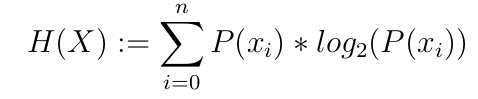

where P (xi ) represents the probability that the user sees news related to a
given topic. If a user does not view any news on a particular topic, the relative
entropy change is considered as 0. Finally, the entropy changes relating to all
topics are added to obtain the total entropy of the user.

In [9]:
def calculate_american_user_entropy(matrix):
    users = []

    # iterate through columns
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  

        # extracts value in row 0, 1 and 2 of user_index column
        rep = matrix[0, user_index]
        dem = matrix[1, user_index]
        neu = matrix[2, user_index]

        total = rep + dem + neu
        if total == 0:
            entropy = 0  # avoid division by zero
        else:
            rep_frac = rep / total
            dem_frac = dem / total
            neu_frac = neu / total

            if(rep_frac != 0):
                rep_var = -rep_frac * np.log(rep_frac)
            else:
                rep_var = 0
            if(dem_frac != 0): 
                dem_var = - dem_frac * np.log(dem_frac)
            else:
                dem_var = 0
            if(neu_frac != 0):  
                neu_var = - neu_frac * np.log(neu_frac)
            else:
                neu_var = 0
                
            if(not(math.isnan(rep_var)) and not(math.isnan(dem_var)) and not(math.isnan(neu_var))):
                entropy = rep_var + dem_var + neu_var

        user['rep'] = rep_var
        user['dem'] = dem_var
        user['neu'] = neu_var
        users.append(user)

    return users

In [10]:
american_user_entropies = calculate_american_user_entropy(americanNews_matrix)

for user in american_user_entropies:
    print(f"Rep for User U{user['User']}: {user['rep']:.2f}")
    print(f"Dem for User U{user['User']}: {user['dem']:.2f}")
    print(f"Neu for User U{user['User']}: {user['neu']:.2f}")
    print("==========================================")

Rep for User U1: 0.37
Dem for User U1: 0.27
Neu for User U1: 0.00
Rep for User U2: 0.27
Dem for User U2: 0.37
Neu for User U2: 0.00
Rep for User U3: 0.30
Dem for User U3: 0.35
Neu for User U3: 0.37
Rep for User U4: 0.00
Dem for User U4: 0.35
Neu for User U4: 0.22
Rep for User U5: 0.00
Dem for User U5: 0.35
Neu for User U5: 0.22
Rep for User U6: 0.00
Dem for User U6: 0.35
Neu for User U6: 0.22
Rep for User U7: 0.00
Dem for User U7: 0.35
Neu for User U7: 0.22
Rep for User U8: 0.00
Dem for User U8: 0.35
Neu for User U8: 0.22
Rep for User U9: 0.00
Dem for User U9: 0.27
Neu for User U9: 0.37


In [11]:
def calculate_indian_user_entropy(matrix):
    users = []

    # iterate through columns
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  

        # extracts value in row 0, 1 and 2 of user_index column
        gov = matrix[0, user_index]
        opp = matrix[1, user_index]
        neu = matrix[2, user_index]

        total = gov + opp + neu
        if total == 0:
            entropy = 0  # avoid division by zero
        else:
            gov_frac = gov / total
            opp_frac = opp / total
            neu_frac = neu / total

            if(gov_frac != 0):
                gov_var = -gov_frac * np.log(gov_frac)
            else:
                gov_var = 0
            if(opp_frac != 0): 
                opp_var = - opp_frac * np.log(opp_frac)
            else:
                opp_var = 0
            if(neu_frac != 0):  
                neu_var = - neu_frac * np.log(neu_frac)
            else:
                neu_var = 0
                
            if(not(math.isnan(gov_var)) and not(math.isnan(opp_var)) and not(math.isnan(neu_var))):
                entropy = gov_var + opp_var + neu_var

        user['gov'] = gov_var
        user['opp'] = opp_var
        user['neu'] = neu_var
        users.append(user)

    return users

In [12]:
indian_user_entropies = calculate_indian_user_entropy(indianNews_matrix)

# Stampa i risultati con nomi utente personalizzati
for user_index, user in enumerate(indian_user_entropies, start=11):
    user_name = f"I{user_index}"
    print(f"Gov for User {user_name}: {user['gov']:.2f}")
    print(f"Opp for User {user_name}: {user['opp']:.2f}")
    print(f"Neu for User {user_name}: {user['neu']:.2f}")
    print("==========================================")


Gov for User I11: 0.35
Opp for User I11: 0.30
Neu for User I11: 0.37
Gov for User I12: 0.35
Opp for User I12: 0.37
Neu for User I12: 0.30
Gov for User I13: 0.30
Opp for User I13: 0.27
Neu for User I13: 0.30
Gov for User I14: 0.00
Opp for User I14: -0.00
Neu for User I14: 0.00
Gov for User I15: 0.37
Opp for User I15: 0.32
Neu for User I15: 0.37
Gov for User I16: 0.37
Opp for User I16: 0.00
Neu for User I16: 0.29
Gov for User I17: 0.35
Opp for User I17: 0.00
Neu for User I17: 0.35
Gov for User I18: 0.35
Opp for User I18: 0.00
Neu for User I18: 0.35
Gov for User I19: 0.35
Opp for User I19: 0.00
Neu for User I19: 0.35
Gov for User I20: 0.35
Opp for User I20: 0.00
Neu for User I20: 0.35
Gov for User I21: 0.28
Opp for User I21: 0.32
Neu for User I21: 0.36
